Increasing trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 2.2 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74585 sha256=8dc8ecb9b7387e4153c380fb1ed8a660c3c9d2f8e4b997154d463edee863ce68
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 5.5 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 5.5 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=6efd38f66c987ec3ebb1dc98087834becc4326f79b69da600551d87265dccda0
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khagestar = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khagestar.csv')
khagestar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,NaN,3020.000000,NaN
1,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,NaN,3056.000000,NaN
2,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,NaN,3043.684211,NaN
3,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,NaN,3013.076923,NaN
4,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.0,2988.862559,NaN
...,...,...,...,...,...,...,...,...,...,...,...
190,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.8,2475.495420,57.536243
191,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.4,2448.663614,50.593710
192,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.2,2419.775742,48.661575
193,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.2,2375.183828,44.451307


In [6]:
khagestar_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خگستر.xlsx')
khagestar_social

,date and time,view
0,۱۴:۰۴:۰۲ ۱۴۰۰/۰۱/۰۲,216
1,۱۲:۳۶:۵۳ ۱۴۰۰/۰۱/۰۳,3225
2,۱۲:۲۴:۳۹ ۱۴۰۰/۰۱/۰۴,3548
3,۰۱:۱۰:۱۴ ۱۴۰۰/۰۱/۰۵,220
4,۲۰:۱۷:۱۲ ۱۴۰۰/۰۱/۰۵,5408
...,...,...
8785,۱۴:۲۵:۰۸ ۱۴۰۰/۱۱/۰۳,4828
8786,۱۴:۵۴:۰۷ ۱۴۰۰/۱۱/۰۳,1134
8787,۱۴:۵۴:۳۸ ۱۴۰۰/۱۱/۰۳,139
8788,۱۵:۴۳:۳۳ ۱۴۰۰/۱۱/۰۳,6953


In [7]:
khagestar_social.columns = ['date and time', 'view']
khagestar_social['presian_date'] = khagestar_social['date and time'].apply(lambda x: x.split(" ")[1])
khagestar_social['gregorian_date'] = khagestar_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khagestar_social = khagestar_social[['gregorian_date', 'view']]
khagestar_social = khagestar_social.groupby(by='gregorian_date').mean()
khagestar_social['gregorian_date'] = khagestar_social.index
khagestar_social['gregorian_date'] = khagestar_social['gregorian_date'].astype(str)
khagestar_social['index'] = [i for i in range(len(khagestar_social))]
khagestar_social.set_index('index', inplace=True)
khagestar_social

,view,gregorian_date
index,,
0,216.000000,2021-03-22
1,3225.000000,2021-03-23
2,3548.000000,2021-03-24
3,1871.000000,2021-03-25
4,1767.600000,2021-03-26
...,...,...
293,178.708333,2022-01-18
294,1488.409091,2022-01-19
295,330.142857,2022-01-21


In [8]:
khagestar_df=pd.merge(khagestar,khagestar_social, on='gregorian_date', how='inner')
khagestar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,NaN,3020.000000,NaN,2356.988372
1,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,NaN,3056.000000,NaN,5072.720000
2,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,NaN,3043.684211,NaN,1423.720000
3,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,NaN,3013.076923,NaN,931.769231
4,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.0,2988.862559,NaN,557.066667
...,...,...,...,...,...,...,...,...,...,...,...,...
190,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.8,2475.495420,57.536243,1919.065217
191,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.4,2448.663614,50.593710,178.708333
192,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.2,2419.775742,48.661575,1488.409091
193,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.2,2375.183828,44.451307,333.140625


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khagestar_df['view'] = khagestar_df['view'].to_frame()
khagestar_df['SMA5_view'] = khagestar_df['view'].rolling(5).mean()
khagestar_df['EWMA5_view'] = khagestar_df['view'].ewm(span=5).mean()
khagestar_df['RSI_view'] = computeRSI(khagestar_df['view'], 14)

In [11]:
khagestar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,NaN,3020.000000,NaN,2356.988372,NaN,2356.988372,NaN
1,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,NaN,3056.000000,NaN,5072.720000,NaN,3986.427349,NaN
2,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,NaN,3043.684211,NaN,1423.720000,NaN,2772.513341,NaN
3,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,NaN,3013.076923,NaN,931.769231,NaN,2007.896557,NaN
4,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.0,2988.862559,NaN,557.066667,2068.452854,1450.942902,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.8,2475.495420,57.536243,1919.065217,1475.438397,1428.758703,52.287703
191,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.4,2448.663614,50.593710,178.708333,1136.033489,1012.075246,44.733474
192,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.2,2419.775742,48.661575,1488.409091,1004.309467,1170.853194,50.526216
193,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.2,2375.183828,44.451307,333.140625,935.818752,891.615671,45.950991


# RSI

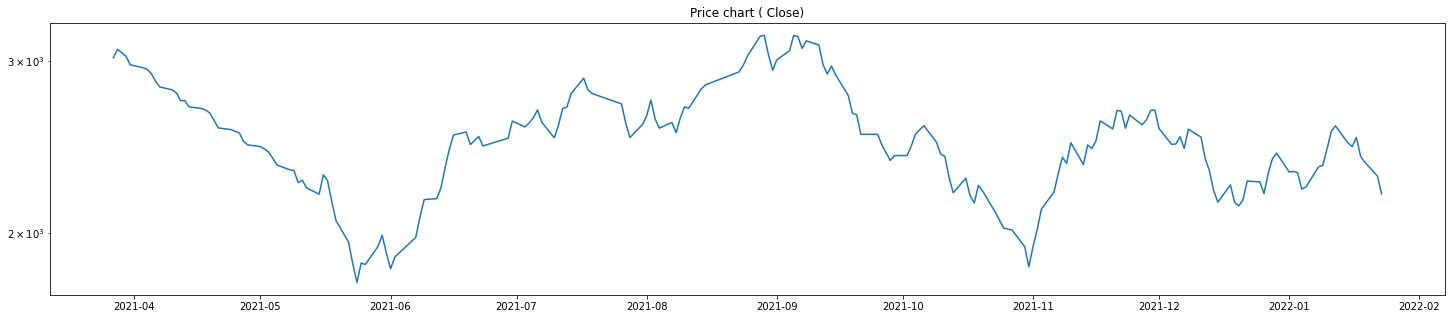

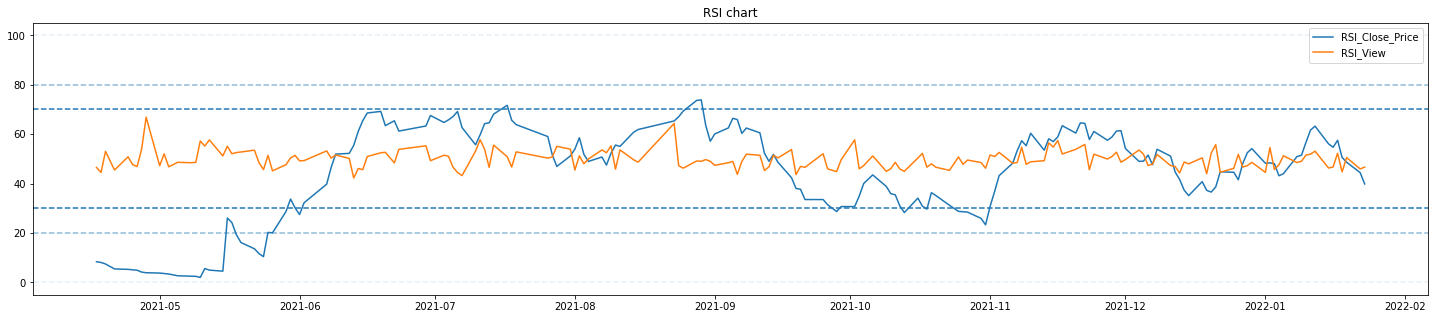

In [12]:
plt.figure(figsize=(25,5))
khagestar_df['date'] = pd.to_datetime(khagestar_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khagestar_df['date'], khagestar_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khagestar_df['date'], khagestar_df['RSI'],label='RSI_Close_Price')
plt.plot(khagestar_df['date'], khagestar_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [13]:
# Force lowercase (optional)
khagestar_df.columns = [x.lower() for x in khagestar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=(khagestar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=khagestar_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=khagestar_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA5

In [14]:
khagestar_df.columns = [x.lower() for x in khagestar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=(khagestar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=khagestar_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khagestar_df['gregorian_date'],
        y=khagestar_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [15]:
khagestar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,NaN,3020.000000,NaN,2356.988372,NaN,2356.988372,NaN,2021-03-27
1,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,NaN,3056.000000,NaN,5072.720000,NaN,3986.427349,NaN,2021-03-28
2,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,NaN,3043.684211,NaN,1423.720000,NaN,2772.513341,NaN,2021-03-30
3,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,NaN,3013.076923,NaN,931.769231,NaN,2007.896557,NaN,2021-03-31
4,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.0,2988.862559,NaN,557.066667,2068.452854,1450.942902,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.8,2475.495420,57.536243,1919.065217,1475.438397,1428.758703,52.287703,2022-01-17
191,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.4,2448.663614,50.593710,178.708333,1136.033489,1012.075246,44.733474,2022-01-18
192,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.2,2419.775742,48.661575,1488.409091,1004.309467,1170.853194,50.526216,2022-01-19
193,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.2,2375.183828,44.451307,333.140625,935.818752,891.615671,45.950991,2022-01-22


In [16]:
khagestar_df['sma5']=khagestar_df['sma5'].fillna(value=khagestar_df['sma5'].mean())
khagestar_df['rsi']=khagestar_df['rsi'].fillna(value=khagestar_df['rsi'].mean())
khagestar_df['sma5_view']=khagestar_df['sma5_view'].fillna(value=khagestar_df['sma5_view'].mean())
khagestar_df['rsi_view']=khagestar_df['rsi_view'].fillna(value=khagestar_df['rsi_view'].mean())

In [17]:
khagestar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,2480.811518,3020.000000,44.016945,2356.988372,2030.934959,2356.988372,49.870821,2021-03-27
1,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,2480.811518,3056.000000,44.016945,5072.720000,2030.934959,3986.427349,49.870821,2021-03-28
2,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,2480.811518,3043.684211,44.016945,1423.720000,2030.934959,2772.513341,49.870821,2021-03-30
3,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,2480.811518,3013.076923,44.016945,931.769231,2030.934959,2007.896557,49.870821,2021-03-31
4,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.000000,2988.862559,44.016945,557.066667,2068.452854,1450.942902,49.870821,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.800000,2475.495420,57.536243,1919.065217,1475.438397,1428.758703,52.287703,2022-01-17
191,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.400000,2448.663614,50.593710,178.708333,1136.033489,1012.075246,44.733474,2022-01-18
192,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.200000,2419.775742,48.661575,1488.409091,1004.309467,1170.853194,50.526216,2022-01-19
193,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.200000,2375.183828,44.451307,333.140625,935.818752,891.615671,45.950991,2022-01-22


In [18]:
khagestar_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price

In [24]:
#khagestar_new = khagestar_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
khagestar_new = khagestar_df[['gregorian_date','close']]
#khagestar_new = khagestar_df[['gregorian_date','close']]

print("Shape of dataframe:", khagestar_new.shape)

Shape of dataframe: (195, 2)


In [25]:
del khagestar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khagestar_new=scaler.fit_transform(np.array(khagestar_new).reshape(-1,1))


In [26]:
def split(y, train_size=0.75):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [27]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khagestar_new, train_size=0.80)
# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)
# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating model

In [29]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [30]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
5/5 [==============================] - 10s 477ms/step - loss: 0.2139 - val_loss: 0.0331
Epoch 2/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0577 - val_loss: 0.0399
Epoch 3/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0629 - val_loss: 0.0133
Epoch 4/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0356 - val_loss: 0.0072
Epoch 5/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0409 - val_loss: 0.0065
Epoch 6/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0347 - val_loss: 0.0086
Epoch 7/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0333 - val_loss: 0.0116
Epoch 8/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0323 - val_loss: 0.0071
Epoch 9/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0305 - val_loss: 0.0061
Epoch 10/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0304 - val_loss: 0.0066
Epoch 11/50
5/5 [==========

# Loss

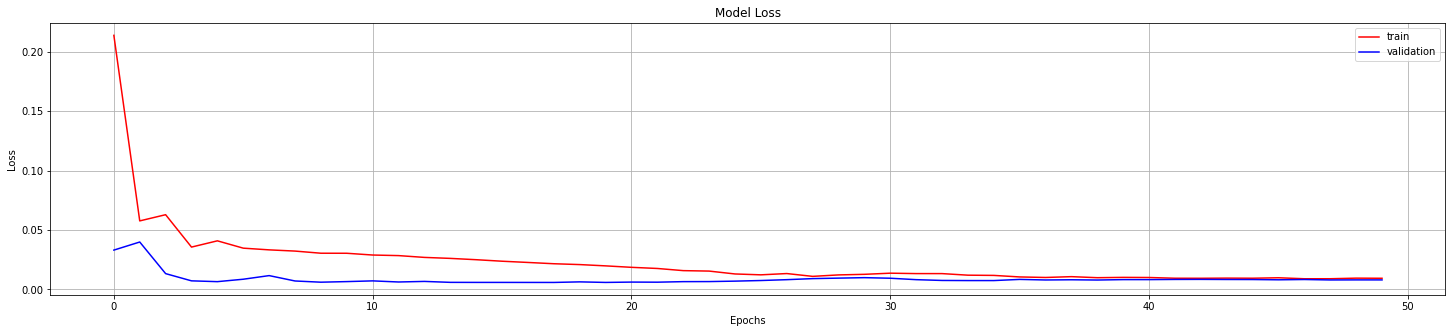

In [31]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [32]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [33]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: -0.3486799397998428


In [41]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.4449475109577179], [0.40941429138183594], [0.3844531774520874], [0.36948516964912415], [0.3624737560749054]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [42]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khagestar_new[len(khagestar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price','Predicted next 5 days of close price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khagestar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =2192 , 4 bahmn = 2215   (increase > + 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =2192 ,  our model prediction for 4 bahmn(timestamp=16) = 2404 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### SO our accuracy of model is 100%

## Part 2 prediction with social indicators

In [43]:
khagestar_new = khagestar_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


In [44]:
del khagestar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khagestar_new=scaler.fit_transform(np.array(khagestar_new).reshape(-1,1))


In [45]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khagestar_new, train_size=0.80)
# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)
# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [46]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [47]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [48]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
19/19 [==============================] - 8s 137ms/step - loss: 0.1202 - val_loss: 0.0728
Epoch 2/50
19/19 [==============================] - 1s 27ms/step - loss: 0.1092 - val_loss: 0.0731
Epoch 3/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1088 - val_loss: 0.0719
Epoch 4/50
19/19 [==============================] - 0s 26ms/step - loss: 0.1076 - val_loss: 0.0722
Epoch 5/50
19/19 [==============================] - 0s 24ms/step - loss: 0.1067 - val_loss: 0.0738
Epoch 6/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1057 - val_loss: 0.0747
Epoch 7/50
19/19 [==============================] - 0s 24ms/step - loss: 0.1036 - val_loss: 0.0803
Epoch 8/50
19/19 [==============================] - 0s 26ms/step - loss: 0.1030 - val_loss: 0.0676
Epoch 9/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0970 - val_loss: 0.0838
Epoch 10/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0909 - val_loss: 0.0560
Epoch 11

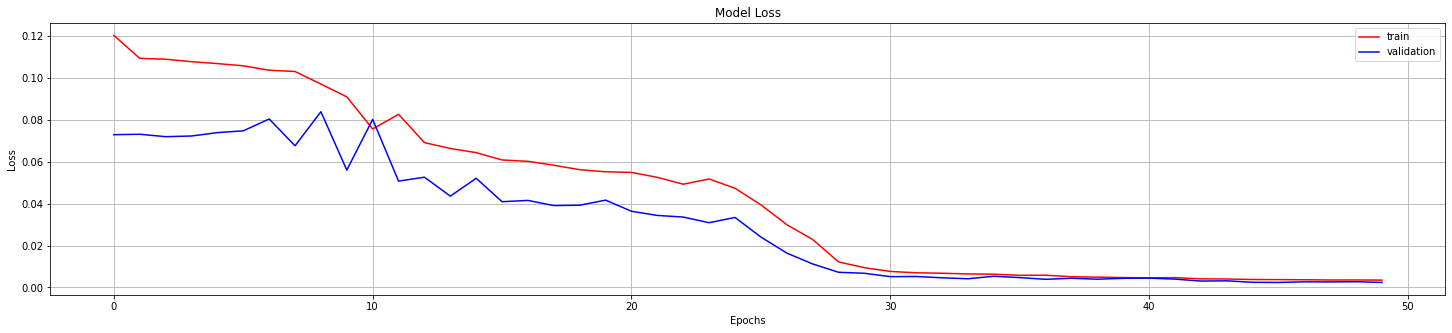

In [49]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [50]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [51]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.9663968184460339


In [52]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[-0.01206960715353489], [0.08067592233419418], [0.5213187336921692], [0.31399601697921753], [-0.0074369036592543125]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


## Prediction

In [53]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khagestar_new[len(khagestar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khagestar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =2192 , 4 bahmn = 2215   (increase > + 0.5 we assaign +1 (based on pdf))
##### Real close_price with indicators --> 3 bahman (timestamp=15) in our data =881.9828 ,  our model prediction for 4 bahmn(timestamp=16) = -42 (decrease <- 0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### SO social indicators cant help us to predict this stock correctly